In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.fft import fft, fftfreq

In [117]:
data = pd.read_csv("EEMD pre-processed.csv", index_col=0)
# data = pd.read_csv("PPG_preprocessed_7680samples.csv", index_col=0)
data

,0,1,2,3,4,5,6,7,8,9,...,7670,7671,7672,7673,7674,7675,7676,7677,7678,7679
0,0.663931,0.673228,0.680865,0.686767,0.690856,0.693012,0.693108,0.691030,0.686672,0.679945,...,0.260019,0.265693,0.270907,0.275464,0.279169,0.281825,0.283237,0.283235,0.281706,0.278621
1,-0.346436,-0.339060,-0.334599,-0.332528,-0.333361,-0.337518,-0.343754,-0.350604,-0.357035,-0.362264,...,-0.459214,-0.476558,-0.494832,-0.513292,-0.531032,-0.547135,-0.560774,-0.571145,-0.577521,-0.579614
2,0.006147,0.012306,0.019583,0.027432,0.033565,0.035933,0.035070,0.032155,0.028423,0.024495,...,-0.130129,-0.148202,-0.170465,-0.195672,-0.222081,-0.247548,-0.269675,-0.285977,-0.294201,-0.293254
3,0.706260,0.710875,0.718151,0.727619,0.737606,0.746638,0.754608,0.762003,0.769256,0.775901,...,-0.063941,-0.069723,-0.078821,-0.090454,-0.103439,-0.116418,-0.128039,-0.136965,-0.142127,-0.143577
4,0.260278,0.266945,0.271669,0.273894,0.272562,0.267007,0.258485,0.248816,0.239601,0.231531,...,0.816324,0.805757,0.790572,0.771899,0.751115,0.729661,0.708878,0.690076,0.674429,0.662416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,0.567004,0.568939,0.569360,0.568242,0.565589,0.561423,0.555819,0.548865,0.540651,0.531264,...,-0.194884,-0.237242,-0.277810,-0.315850,-0.350641,-0.381432,-0.407494,-0.428260,-0.443421,-0.453187
1276,-0.493007,-0.503556,-0.505583,-0.499198,-0.484862,-0.463238,-0.435283,-0.402037,-0.364484,-0.323584,...,0.046324,0.061844,0.076756,0.090515,0.102580,0.112444,0.119763,0.124313,0.126044,0.125058
1277,-0.344838,-0.365852,-0.388917,-0.413664,-0.439630,-0.466352,-0.493365,-0.520206,-0.546412,-0.571518,...,0.002551,0.007659,0.012386,0.016654,0.020383,0.023494,0.025906,0.027567,0.028509,0.028788
1278,-0.005694,-0.005787,-0.005646,-0.005078,-0.003900,-0.001937,0.001006,0.005123,0.010578,0.017430,...,0.253133,0.253186,0.251231,0.247285,0.241414,0.233737,0.224440,0.213729,0.201806,0.188892


In [118]:
subjects = 32
number_of_trials = 1280


# Signal Segmentation Code - Transforming a signal into windows keeping window length and window overlap as parameters
def signal_segmentation(row, length, overlap, rate):

    time = (int)(len(row)/rate)

    if((time - length)%(length-overlap) == 0):
        frames = []
        time_points = len(row)
        step = (length - overlap)*rate
        window_samples = length*rate
        number_of_frames = (int)((time_points - window_samples)/(step) + 1) ## For length = 10, overlap = 5 we get number of frames as 11

        for i in range(number_of_frames):
            start = i*rate
            end = start + window_samples
            frame = row[start:end]
            frames.append(frame)
        return frames

    else:
        return "Invalid Input"

#The above code may need some correction for generalising different window lengths and overlap sizes - edge cases not taken care of - Should we do padding?

In [119]:
## Initialising standard variables
rate = 128
time = (int)(data.shape[1])/rate
samples = rate * time
length = 10
overlap = 5

all_frames = []

for i in range(number_of_trials):
    row = data.loc[i,:]
    try:
        frames = signal_segmentation(row, length, overlap, rate)
        all_frames.extend(np.array(frames))
    except:
        print("Edge cases not supported")
        break
data = pd.DataFrame(all_frames)
data

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.663931,0.673228,0.680865,0.686767,0.690856,0.693012,0.693108,0.691030,0.686672,0.679945,...,-0.806935,-0.821001,-0.832274,-0.840422,-0.845117,-0.845991,-0.842660,-0.834743,-0.821866,-0.803662
1,0.537557,0.517294,0.497064,0.476801,0.456477,0.436078,0.415597,0.395087,0.374656,0.354285,...,-0.808459,-0.795237,-0.774780,-0.746779,-0.711091,-0.667667,-0.616526,-0.557824,-0.491899,-0.419322
2,0.642394,0.632157,0.621328,0.609709,0.597167,0.583611,0.568952,0.553113,0.536069,0.517908,...,0.062296,0.124565,0.185271,0.243794,0.299522,0.351902,0.400482,0.444976,0.485318,0.521529
3,0.531644,0.519266,0.507105,0.494492,0.480666,0.464813,0.446135,0.423964,0.397953,0.368269,...,0.452114,0.452610,0.449742,0.443969,0.435867,0.426071,0.415225,0.403933,0.392729,0.382079
4,0.392146,0.368736,0.342955,0.314880,0.284733,0.252785,0.219343,0.184711,0.149180,0.113044,...,0.235824,0.235186,0.234706,0.233964,0.232520,0.230217,0.227017,0.222931,0.218103,0.212729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14075,-0.415321,-0.415436,-0.413759,-0.410192,-0.404648,-0.397037,-0.387265,-0.375245,-0.360888,-0.344090,...,-0.193898,-0.202775,-0.213979,-0.227604,-0.243664,-0.262101,-0.282847,-0.305841,-0.331007,-0.358260
14076,-0.037662,-0.035188,-0.031909,-0.027960,-0.023460,-0.018492,-0.013129,-0.007446,-0.001542,0.004460,...,-0.198157,-0.189905,-0.183346,-0.178548,-0.175536,-0.174234,-0.174473,-0.175968,-0.178349,-0.181197
14077,0.023159,0.015971,0.008912,0.002118,-0.004212,-0.009904,-0.014926,-0.019448,-0.023835,-0.028536,...,0.661606,0.652155,0.640326,0.626440,0.610857,0.594076,0.576661,0.559090,0.541701,0.524757
14078,-0.241245,-0.252532,-0.261599,-0.267979,-0.271359,-0.271964,-0.270232,-0.266625,-0.261604,-0.255630,...,-0.272557,-0.274457,-0.276876,-0.280037,-0.284023,-0.288792,-0.294280,-0.300429,-0.307196,-0.314553


# **Feature Extraction**

### Fiducial Points

In [120]:
from scipy.signal import butter, filtfilt, find_peaks

def fiducial_points(signal, rate):

    t = np.arange(len(signal))/rate

    peaks, _ = find_peaks(signal, distance=int(0.5*rate))  # Systolic peaks
    onsets, _ = find_peaks(-signal, distance=int(0.5*rate))    # Pulse onsets

    dicrotic_notches = []
    diastolic_peaks = []
    systolic_peaks = []
    ms = []
    a, b, c, d, e, f = [], [], [], [], [], []
    p1, p2 = [], []


    for i in range(1, len(onsets)):
        # Current pulse window
        start, end = onsets[i-1], onsets[i]
        x = signal[start:end]
        pulse_interval = t[start:end]
        T = len(x)

        threshold_1 = start + 0.6*T
        threshold_2 = start + 0.8*T

        # Extracting derivatives
        x1 = np.gradient(x)
        x2 = np.gradient(x1)
        x3 = np.gradient(x2)

        # From x
        sys_idx = np.argmax(x)
        ms_idx = np.argmax(x1)

        # From x2
        if ms_idx < 1 or ms_idx >= len(x2):
            continue  # skip invalid ms_idx
        a_idx = np.argmax(x2[:ms_idx])

        b_candidates, _ = find_peaks(-x2[a_idx:])
        b_idx = a_idx + b_candidates[0]

        # Placeholder for e, then dic
        e_candidates, _ = find_peaks(x2[ms_idx:int(threshold_1)])
        if len(e_candidates) > 0:
            e_idx = ms_idx + e_candidates[1] if len(e_candidates) > 1 else ms_idx + e_candidates[0]
        else:
            e_idx = ms_idx + (int(threshold_1) - start - ms_idx) // 2

        dic_idx = e_idx

        # c between b and e
        c_candidates, _ = find_peaks(x2[b_idx:e_idx])
        if len(c_candidates) > 0:
            c_idx = b_idx + c_candidates[0]
        else:
            # Fallback: set c_idx as midpoint between b and e or just use b_idx
            c_idx = b_idx + (e_idx - b_idx) // 2

        # d after c and before e
        if e_idx > c_idx and len(x2)>0:
            d_idx = c_idx + np.argmin(x2[c_idx:e_idx])
        else:
            d_idx = c_idx

        # f after e and before 0.8T
        if int(threshold_2) > e_idx and len(x2[e_idx:int(threshold_2)]) > 0:
            f_idx = e_idx + np.argmin(x2[e_idx:int(threshold_2)])
        else:
            f_idx = e_idx

        # Getting diastolic peak and dicrotic notch
        dic_idx = c_idx
        dia_candidates, _ = find_peaks(x[dic_idx:int(threshold_2)])
        dia_idx = dic_idx + dia_candidates[0] if len(dia_candidates) > 0 else dic_idx + (int)((end-start)/10)
        if (dia_idx > (end-start)):
            dia_idx = end-start-1

        # Extracting features from x3
        p1_candidates, _ = find_peaks(x3[b_idx:])
        p1_idx = b_idx + p1_candidates[0] if len(p1_candidates)>0 else b_idx

        # p2 logic
        p2_candidates, _ = find_peaks(-x3[:d_idx])
        p2_idx = p2_candidates[-1] if len(p2_candidates) > 0 else d_idx

        # if(dic_idx >= sys_idx and dia_idx >= dic_idx): Reverse PPG pulse was observed resulting in slightly incorrect observations
        systolic_peaks.append(start + sys_idx)
        dicrotic_notches.append(start + dic_idx)
        diastolic_peaks.append(start + dia_idx)
        ms.append(start + ms_idx)
        a.append(start + a_idx)
        b.append(start + b_idx)
        c.append(start + c_idx)
        d.append(start + d_idx)
        e.append(start + e_idx)
        f.append(start + f_idx)
        p1.append(start + p1_idx)
        p2.append(start + p2_idx)


    # Returning a list of indices of all fiducial points in the signal - a trial has 7680 indices in total
    return {'Systolic_peaks': systolic_peaks,
            'Onsets': onsets,
            'Dicrotic_notches': dicrotic_notches,
            'Diastolic_peaks': diastolic_peaks,
            'Maximum Slope': ms,
            'Point_a': a,
            'Point_b': b,
            'Point_c': c,
            'Point_d': d,
            'Point_e': e,
            'Point_f': f,
            'Point_p1': p1,
            'Point_p2': p2,
           }

### Area (Morphological Feature)

In [121]:
## AREAS AS FEATURES
from scipy import integrate

def calculate_pulse_areas(pulse, onset_idx, notch_idx, end_idx, rate):

    # Systolic area (onset to notch)
    sys_segment = pulse[:notch_idx-onset_idx+1]
    sys_time = np.arange(len(sys_segment)) / rate
    systolic_area = integrate.trapezoid(sys_segment, sys_time)

    # Diastolic area (notch to end)
    dias_segment = pulse[:end_idx-notch_idx+1]
    dias_time = np.arange(len(dias_segment)) / rate
    diastolic_area = integrate.trapezoid(dias_segment, dias_time)

    # Normalized IPA ratio
    ipa_ratio = diastolic_area / (systolic_area + 1e-6)  # Prevent division by zero

    return [systolic_area, diastolic_area, ipa_ratio, systolic_area + diastolic_area]

### Area rate (Morphological Feature)

In [122]:
from scipy import integrate

def calculate_pulse_area_rates(pulse, onset_idx, sys_peak_idx, dia_peak_idx, end_idx, rate):
    # Rise area (onset to sys_peak)
    if sys_peak_idx > onset_idx:
        rise_segment = pulse[:sys_peak_idx-onset_idx+1]
        rise_time = np.arange(len(rise_segment)) / rate
        rising_duration = (sys_peak_idx - onset_idx) / rate
        rise_area_rate = integrate.trapezoid(np.abs(rise_segment), rise_time) / rising_duration
    else:
        rise_area_rate = np.nan  # Invalid rise segment

    # Fall area (dia_peak to end)
    if end_idx > dia_peak_idx:
        fall_segment = pulse[:end_idx-dia_peak_idx+1]
        fall_time = np.arange(len(fall_segment)) / rate
        falling_duration = (end_idx - dia_peak_idx) / rate
        fall_area_rate = integrate.trapezoid(np.abs(fall_segment), fall_time) / falling_duration
    else:
        fall_area_rate = np.nan  # Invalid fall segment

    # Total area (onset to end)
    if end_idx > onset_idx:
        total_segment = pulse[:end_idx-onset_idx+1]
        total_time = np.arange(len(total_segment)) / rate
        total_duration = (end_idx - onset_idx) / rate
        total_area_rate = integrate.trapezoid(total_segment, total_time) / total_duration
    else:
        total_area_rate = np.nan  # Invalid total segment

    return [rise_area_rate, fall_area_rate, total_area_rate]

### Energy Features

In [123]:
def multiscale_entropy_all(signal, scales=range(1, 6), m=2, r=0.2, rate=128):

    entropy_features = {}

    for scale in scales:
        if len(signal) < scale:
            entropy_features[f"MSE_SampEn_τ{scale}"] = np.nan
            entropy_features[f"MSE_ApEn_τ{scale}"] = np.nan
            entropy_features[f"MSE_PermEn_τ{scale}"] = np.nan
            continue

        # Coarse-grain the time series
        coarse = np.mean(signal[:len(signal) - len(signal) % scale].reshape(-1, scale), axis=1)

        # Calculate entropies at this scale
        se = ant.sample_entropy(coarse)
        ae = ant.app_entropy(coarse)
        pe = ant.perm_entropy(coarse)

        # Store in dictionary
        entropy_features[f"MSE_SampEn_τ{scale}"] = se
        entropy_features[f"MSE_ApEn_τ{scale}"] = ae
        entropy_features[f"MSE_PermEn_τ{scale}"] = pe

    return entropy_features

### Frequency domain feature (Harmoic Frequency)

In [124]:
import numpy as np
from scipy.signal import welch
from scipy.integrate import simpson

def bandpower(freqs, psd, band):

    # Find indices of frequencies within the band
    idx_band = np.logical_and(freqs >= band[0], freqs <= band[1])

    # Integrate the power spectral density over the band
    power = simpson(psd[idx_band], x = freqs[idx_band])
    return power

def calculate_ppg_band_features(ppg_signal, fs, heart_rate_bpm):

    # Estimate fundamental frequency from heart rate (Hz)
    f0 = heart_rate_bpm / 60.0
    # print(f0)

    # Define bandwidth for fundamental and harmonics (Hz)
    # Bandwidth of ±0.2 Hz is chosen to accommodate physiological heart rate variability,
    # measurement noise, and slight frequency shifts due to emotional or physical changes.
    # This range is wide enough to capture the main peak and its spread, but narrow enough
    # to avoid unrelated spectral content.
    bandwidth = 0.4  # Total bandwidth (±0.2 Hz)

    # Calculate power spectral density using Welch's method
    freqs, psd = welch(ppg_signal, fs, nperseg=6*fs)  # 4-second window
    # print(list(zip(freqs, psd))[:30])

    # Define frequency bands for fundamental, first harmonic, and second harmonic
    bands = {
        'fundamental': (f0 - bandwidth/2, f0 + bandwidth/2),
        'first_harmonic': (2*f0 - bandwidth/2, 2*f0 + bandwidth/2),
        'second_harmonic': (3*f0 - bandwidth/2, 3*f0 + bandwidth/2)
    }


    # Calculate power in each band
    power_fundamental = round(bandpower(freqs, psd, bands['fundamental']), 5)
    power_first_harmonic = round(bandpower(freqs, psd, bands['first_harmonic']), 5)
    power_second_harmonic = round(bandpower(freqs, psd, bands['second_harmonic']), 5)
    total_power = power_fundamental + power_first_harmonic + power_second_harmonic

    if total_power == 0:
        std_fund = std_first = std_second = 0.0
    else:
        std_fund = power_fundamental / total_power
        std_first = power_first_harmonic / total_power
        std_second = power_second_harmonic / total_power

    FHF = power_first_harmonic / power_fundamental if power_fundamental != 0 else 0.0
    SHF = power_second_harmonic / power_fundamental if power_fundamental != 0 else 0.0
    SHFH = power_second_harmonic / power_first_harmonic if power_first_harmonic != 0 else 0.0

    return {
        'power_fundamental': power_fundamental, #72
        'power_first_harmonic': power_first_harmonic, #73
        'power_second_harmonic': power_second_harmonic, #74
        'standardised_power_fundamental' : std_fund, #75
        'standardised_first_harmonic' : std_first, #76
        'standardised_second_harmonic' : std_second, #77
        'FHF': FHF, #78
        'SHF': SHF, #79
        'SHFH': SHFH #80
    }

### Wavelet Transform (Time-Frequency domain Features)

In [125]:
import pywt


# DWT Feature Extraction Function
def extract_dwt_features(signal, wavelet='db2', level=4):
    """
    Extract features from a signal using Discrete Wavelet Transform (DWT).
    
    Parameters:
    - signal: 1D NumPy array representing the input signal (e.g., PPG, ECG, EEG)
    - wavelet: Wavelet type (default: 'db2' - Daubechies 2)
    - level: Number of decomposition levels (default: 4)
    
    Returns:
    - features: List of extracted features (max, mean, min, std) for each subband
    """
    # Perform DWT decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    
    # Initialize feature list
    features = []
    
    # Extract features from each coefficient subband (A4, D4, D3, D2, D1)
    for coeff in coeffs:
        features.append(np.max(coeff))    # Maximum
        features.append(np.mean(coeff))   # Mean
        features.append(np.min(coeff))    # Minimum
        features.append(np.std(coeff))    # Standard deviation
    
    return features


### Processing

In [126]:
def align_fiducials(fiducial):
    """
    Trim all fiducial point arrays to the minimum valid pulse count.
    """
    # Get the minimum length among all fiducial arrays
    min_len = min(len(points) for points in fiducial.values())

    # # Create a new dictionary with trimmed lists
    # aligned_fiducial = {
    #     key: value[:min_len]
    #     for key, value in fiducial.items()
    # }
    return min_len

In [127]:
def fix_duration(duration_array):
    for i in range(len(duration_array)):
        if duration_array[i] <= 0:
            if i == 0:
                valid = duration_array[duration_array > 0]
            else:
                valid = duration_array[:i][duration_array[:i] > 0]
            duration_array[i] = np.mean(valid) if len(valid) > 0 else 1e-6
    return duration_array

In [128]:
array = np.array([0,1,44,7,8,0,4,3,6,89,9,0,6])
new_array = fix_duration(array)
new_array

array([17,  1, 44,  7,  8, 15,  4,  3,  6, 89,  9, 18,  6])

In [129]:
pip install antropy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [130]:
pip install EntropyHub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [131]:
from scipy import stats
from tqdm import tqdm

# Initialising the final Features vector which will have features from all segments of the signal
Features = []

#Looping through all segments in the dataset named data
for i in tqdm(range(data.shape[0])):
    signal = np.array(data.loc[i,:])

    ## EXTRACTING MORPHOLOGICAL FEATURES
    # Taking x, x1, x2 for morphological features
    x = signal
    x1 = np.gradient(x)
    x2 = np.gradient(x1)

    fiducial = fiducial_points(x, rate)
    req_len = align_fiducials(fiducial)

    t = np.arange(len(x)) / rate

    features_1 = {}

    # Let's check how you would do feature aggregation at the pulse level for one feature
    # Feature is mean(t(sys) - t(dia))

    onsets = fiducial['Onsets'][:req_len]
    pulse_ends = fiducial['Onsets'][1:req_len+1]

    sys_peaks = fiducial['Systolic_peaks']
    dia_peaks = fiducial['Diastolic_peaks']
    dic_notches = fiducial['Dicrotic_notches']

    a = fiducial['Point_a']
    b = fiducial['Point_b']
    c = fiducial['Point_c']
    d = fiducial['Point_d']
    e = fiducial['Point_e']
    f = fiducial['Point_f']

    p1 = fiducial['Point_p1']
    p2 = fiducial['Point_p2']

    # TIMINGS AS FEATURES
    avg_time_diff_sys_dia = np.mean(np.abs(t[dia_peaks] - t[sys_peaks]))
    iqr_time_diff_sys_dia = stats.iqr(np.abs(t[dia_peaks] - t[sys_peaks]))


    avg_time_diff_onset_sys = np.mean(np.abs(t[sys_peaks] - t[onsets]))
    iqr_time_diff_onset_sys = stats.iqr(np.abs(t[sys_peaks] - t[onsets]))


    avg_time_diff_onset_dic = np.mean(np.abs(t[dic_notches] - t[onsets]))
    iqr_time_diff_onset_dic = stats.iqr(np.abs(t[dic_notches] - t[onsets]))


    avg_time_diff_dic_ends = np.mean(np.abs(t[pulse_ends] - t[dic_notches]))
    iqr_time_diff_dic_ends = stats.iqr(np.abs(t[pulse_ends] - t[dic_notches]))


    avg_t_ratio = np.mean(t[sys_peaks]/t[dia_peaks])
    avg_time_diff_p1_dia = np.mean(np.abs(t[dia_peaks] - t[p1]))
    avg_time_diff_p2_dia = np.mean(np.abs(t[dia_peaks] - t[p2]))

    pulse_rate = 60/np.mean(t[pulse_ends] - t[onsets])


    # AMPLITUDES AS FEATURES
    avg_pulse_wave_amplitude = np.mean(signal[sys_peaks] - signal[onsets])
    std_pulse_wave_amplitude = np.std(signal[sys_peaks] - signal[onsets])
    avg_augmentation_index = np.mean((signal[p2] - signal[p1])/(signal[sys_peaks] - signal[onsets]))
    avg_reflection_index = np.mean((signal[dia_peaks] - signal[onsets])/(signal[sys_peaks] - signal[onsets]))
    avg_reflection_index_p1 = np.mean((signal[dia_peaks] - signal[onsets])/(signal[p1] - signal[onsets]))
    avg_reflection_index_p2 = np.mean((signal[dia_peaks] - signal[onsets])/(signal[p2] - signal[onsets]))
    ratio_p1_p2 = np.mean((signal[p2] - signal[onsets])/(signal[p1] - signal[onsets]))

    # SLOPES AS FEATURES
    rising_duration = (sys_peaks - onsets) / rate
    falling_duration = (pulse_ends - dia_peaks) / rate

    # Fixing duration arrays for zero values
    if(np.any(falling_duration == 0)):
        falling_duration = fix_duration(falling_duration)

    if(np.any(rising_duration == 0)):
        rising_duration = fix_duration(rising_duration)

    # Calculating rising and falling slopes
    rising_slope = (signal[sys_peaks] - signal[onsets])/rising_duration
    falling_slope = (signal[pulse_ends] - signal[dia_peaks])/falling_duration


    features_1 = {
        'avg_time_diff_sys_dia': avg_time_diff_sys_dia,                    # 1
        'avg_time_diff_onset_sys': avg_time_diff_onset_sys,                # 3
        'iqr_time_diff_onset_sys': iqr_time_diff_onset_sys,                # 4
        'avg_time_diff_onset_dic': avg_time_diff_onset_dic,                # 5
        'iqr_time_diff_onset_dic': iqr_time_diff_onset_dic,                # 6
        'avg_time_diff_dic_ends': avg_time_diff_dic_ends,                  # 7
        'iqr_time_diff_dic_ends': iqr_time_diff_dic_ends,                  # 8
        'avg_t_ratio': avg_t_ratio,                                        # 9
        'avg_time_diff_p1_dia': avg_time_diff_p1_dia,                      # 10
        'avg_time_diff_p2_dia': avg_time_diff_p2_dia,                      # 11
        'pulse_rate': pulse_rate,                                          # 12
        'avg_pulse_wave_amplitude': avg_pulse_wave_amplitude,              # 13
        'std_pulse_wave_amplitude': std_pulse_wave_amplitude,              # 14
        'avg_augmentation_index': avg_augmentation_index,                  # 15
        'avg_reflection_index': avg_reflection_index,                      # 16
        'avg_reflection_index_p1': avg_reflection_index_p1,                # 17
        'avg_reflection_index_p2': avg_reflection_index_p2,                # 18
        'ratio_p1_p2': ratio_p1_p2,                                        # 19
        'avg_rise_slope': np.mean(np.diff(rising_slope)),                  # 20
        'max_rise_slope': np.max(np.diff(rising_slope)),                   # 21
        'avg_fall_slope': np.mean(np.diff(falling_slope)),                 # 22
        'min_fall_slope': np.min(np.diff(falling_slope))                   # 23
    }

    # Taking area features for a signal
    areas = []
    area_rates = []

    # Looping it through the entire signal
    for i in range(len(onsets)):
        onset_idx, sys_peak_idx, notch_idx, dia_peak_idx, end_idx = onsets[i], sys_peaks[i], dic_notches[i], dia_peaks[i], pulse_ends[i]
        pulse = x[onset_idx:end_idx]

        areas.append(calculate_pulse_areas(pulse, onset_idx, notch_idx, end_idx, rate))
        area_rates.append(calculate_pulse_area_rates(pulse, onset_idx, sys_peak_idx, dia_peak_idx, end_idx, rate))


    avg_of_areas = np.nanmean(np.array(areas), axis=0)
    avg_of_area_rates = np.nanmean(np.array(area_rates), axis=0)
    # 24-30

    features_1['avg_systolic_area'], features_1['avg_diastolic_area'], features_1['avg_IPA'], features_1['avg_area_under_pulse'] = avg_of_areas[0], avg_of_areas[1], avg_of_areas[2], avg_of_areas[3] #15-18
    features_1['avg_rise_area_rate'], features_1['avg_fall_area_rate'], features_1['avg_total_area_rate'] = avg_of_area_rates[0], avg_of_area_rates[1], avg_of_area_rates[2]


    # You don't need to pass a pulse here, you can dirctly pass a signal here
    # Extract second derivative PPG waveform characteristics
    a_amp = x2[a]
    b_amp = x2[b]
    c_amp = x2[c]
    d_amp = x2[d]
    e_amp = x2[e]
    f_amp = x2[f]

    # Calculate time intervals
    time_base = np.arange(len(x2)) / rate
    ab_time = time_base[b] - time_base[a]
    bc_time = time_base[c] - time_base[b]
    bd_time = time_base[d] - time_base[b]

    # Compute clinical features from literature
    features_1.update({
        # Amplitudes
        'a_amp': np.mean(a_amp), # 31
        'b_amp': np.mean(b_amp), # 32
        'c_amp': np.mean(c_amp), # 33
        'd_amp': np.mean(d_amp), # 34
        'e_amp': np.mean(e_amp), # 35
        'f_amp': np.mean(f_amp), # 36

        # Ratios (with epsilon to prevent div/0)
        'b/a_ratio': np.mean(b_amp / (a_amp + 1e-6)), #37
        'c/a_ratio': np.mean(c_amp / (a_amp + 1e-6)), #38
        'd/a_ratio': np.mean(d_amp / (a_amp + 1e-6)), #39
        'e/a_ratio': np.mean(e_amp / (a_amp + 1e-6)), #40
        'f/a_ratio': np.mean(f_amp / (a_amp + 1e-6)), #41

        # Time intervals
        'ab_duration': np.mean(ab_time), #42
        'bc_duration': np.mean(bc_time), #43
        'bd_duration': np.mean(bd_time), #44
        'total_wave_duration': np.mean(time_base[f] - time_base[a]), #45

        # Composite indices
        'aging_index': np.mean((b_amp - c_amp - d_amp - e_amp) / (a_amp + 1e-6)), #46
        'vascular_index': np.mean((b_amp + c_amp) / (a_amp + d_amp + 1e-6)) #47
    })

    ## EXTRACTING PRV FEATURES
    import EntropyHub as EH
    from EntropyHub import FuzzEn
    from scipy.stats import entropy
    import antropy as ant

    from scipy.signal import butter, filtfilt, find_peaks, welch
    from scipy.stats import iqr

    features_prv = {}

    peaks, _ = find_peaks(signal, distance=int(0.5*rate))
    # print(peaks, len(peaks))
    # print(np.diff(peaks))

    ibi = t[np.diff(peaks)]
    fs_interp = 4 #Strongly variable based on fs_interp

    # Convert IBIs to milliseconds
    ibi_ms = ibi * 1000
    diff_ibi = np.diff(ibi_ms)

    # Time-Domain Features
    Mean_IBI = np.mean(ibi_ms) #48
    SDNN = np.std(ibi_ms) #49
    MedianNN = np.median(ibi_ms) #50
    IQRNN = iqr(ibi_ms) #51
    CVNN = np.std(ibi_ms) / np.mean(ibi_ms) if np.mean(ibi) != 0 else 0 #52
    RMSSD = np.sqrt(np.mean(np.diff(ibi_ms) ** 2)) #53
    SDSD = np.std(diff_ibi, ddof=1) #54
    CVSD = RMSSD / np.mean(ibi_ms) if np.mean(ibi_ms) != 0 else 0 #55
    NN50 = np.sum(np.abs(diff_ibi) > 50) #56
    PNN50 = (NN50 / len(diff_ibi)) * 100 #57

    # Frequency-Domain Features
    time_stamps = np.cumsum(ibi)
    t_interp = np.arange(0, time_stamps[-1], 1 / fs_interp)
    ibi_interp = np.interp(t_interp, time_stamps[:-1], ibi[:-1])

    # Compute Welch’s power spectral density
    freqs, psd = welch(ibi_interp, fs=fs_interp, nperseg=min(256, len(ibi_interp)))

    # Step 7: Define frequency bands
    vlf_band = (freqs < 0.04)
    lf_band = (freqs >= 0.04) & (freqs < 0.15)
    hf_band = (freqs >= 0.15) & (freqs < 0.4)

    # Step 8: Integrate power in each band
    scaling_factor = 10000  # or 1e5

    vlf_power = np.trapz(psd[vlf_band], freqs[vlf_band]) * scaling_factor
    lf_power = np.trapz(psd[lf_band], freqs[lf_band]) * scaling_factor
    hf_power = np.trapz(psd[hf_band], freqs[hf_band]) * scaling_factor

    vlf_log = np.log10(vlf_power + 1e-10) #58
    lf_log = np.log10(lf_power + 1e-10) #59
    hf_log = np.log10(hf_power + 1e-10) #60

    total_power = vlf_power + lf_power + hf_power #61
    lf_norm = (lf_power / (total_power - vlf_power)) * 100 if total_power > 0 else 0 #62
    hf_norm = (hf_power / (total_power - vlf_power)) * 100 if total_power > 0 else 0 #63
    lf_hf_ratio = lf_power / hf_power if hf_power > 0 else np.inf #64

    ## Adding the features to our dictionary
    features_prv['Mean_IBI'] = Mean_IBI
    features_prv['SDNN'] = SDNN
    features_prv['MedianNN'] = MedianNN
    features_prv['IQRNN'] = IQRNN
    features_prv['CVNN'] = CVNN
    features_prv['RMSSD'] = RMSSD
    features_prv['CVSD'] = CVSD
    features_prv['SDSD'] = SDSD
    features_prv['NN50'] = NN50
    features_prv['PNN50'] = PNN50

    features_prv['VLF_Log_Power'] = vlf_log
    features_prv['LF_Log_Power'] = lf_log
    features_prv['HF_Log_Power'] = hf_log
    features_prv['Total_Power'] = total_power
    features_prv['LF_Norm'] = lf_norm
    features_prv['HF_Norm'] = hf_norm
    features_prv['LF_HF_Ratio'] = lf_hf_ratio

    # Entropy & Complexity
    ApEn = ant.app_entropy(ibi) #58
    # r_val = (0.2 * np.std(ibi), 0.0)
    # FuzzyEn = FuzzEn(ibi, m=2, r=r_val)
    LZC = ant.lziv_complexity(ibi.astype(np.float64)) #59


    features_prv.update({"ApEn": ApEn,
            "LZC": LZC})

    ## TAKING MULTISCALE ENTROPY MEASURES
    entropy_features = multiscale_entropy_all(signal, scales=range(1, 6), m=2, r=0.2) #60-74
    entropy_features.update({"LZC_PPG": ant.lziv_complexity(signal.astype(float))}) #75
    entropy_features

    ## TAKING STATISTICAL FEATURES
    # Frequency-Domain first, followed by Time-Domain
    statistical_features = calculate_ppg_band_features(signal, rate, pulse_rate) #76-84

    # Time-Domain next
    from scipy.stats import skew, kurtosis, entropy

    # Minimum and Maximum
    statistical_features['min'] = np.min(x) #85
    statistical_features['max'] = np.max(x) #86

    # Arithmetic mean (μ)
    statistical_features['mean'] = np.mean(x) #87

    # Mean absolute value
    statistical_features['mean_abs'] = np.mean(np.abs(x)) #88

    # Mean energy
    statistical_features['mean_energy'] = np.mean(x ** 2) #89

    # Root mean square
    statistical_features['rms'] = np.sqrt(np.mean(x ** 2)) #90

    # Standard deviation
    statistical_features['std'] = np.std(x, ddof=0) #91

    # Zero crossing
    statistical_features['zero_cross'] = np.sum(np.sign(x[1:]) != np.sign(x[:-1])) ## Requires double-checking #92

    # Mean absolute deviation
    statistical_features['mad'] = np.mean(np.abs(x - np.mean(x))) #93

    # Skewness
    statistical_features['skewness'] = skew(x, bias=False) #94

    # Kurtosis
    statistical_features['kurtosis'] = kurtosis(x, bias=False) #95

    # Median
    statistical_features['median'] = np.median(x) #96

    # Moments
    for m in [3,4,5,6]:
        statistical_features[f'moment-{m}'] = np.mean((x - np.mean(x))**m) #97-100

    # First degree difference (diff_1)
    statistical_features['diff_1'] = np.mean(np.abs(np.diff(x, n=1))) #101

    # Second degree difference (diff_2) #102
    statistical_features['diff_2'] = np.mean(np.abs(np.diff(x, n=2))) #102

    # Normalized kth degree difference (k = 1, 2)
    std_x = np.std(x, ddof=0)
    for k in [1, 2]:
        diff_k = np.diff(x, n=k)
        statistical_features[f'diff_{k}_kstd'] = np.mean(np.abs(diff_k)) / std_x if std_x != 0 else np.nan #103-104


     ## EXTRACTING DWT FEATURES
    dwt_features_list = extract_dwt_features(signal)
    features_dwt = {}
    subbands = ['cA4', 'cD4', 'cD3', 'cD2', 'cD1']
    stats_name = ['max', 'mean', 'min', 'std']
    for i, subband in enumerate(subbands):
        for j, stat in enumerate(stats_name):
            features_dwt[f'dwt_{subband}_{stat}'] = dwt_features_list[i*4 + j]
            
    ## MERGING ALL FEATURES
    features = {}
    features = {**features_1, **features_prv, **entropy_features, **statistical_features, **features_dwt}
    Features.append(features)

df_features = pd.DataFrame(Features)
df_features.head()

  2%|█▍                                                                            | 269/14080 [00:08<06:59, 32.96it/s]C:\Users\smadd\AppData\Local\Temp\ipykernel_9596\1705650918.py:132: RuntimeWarning: Mean of empty slice
  avg_of_area_rates = np.nanmean(np.array(area_rates), axis=0)
  3%|██▏                                                                           | 405/14080 [00:12<06:32, 34.88it/s]C:\Users\smadd\AppData\Local\Temp\ipykernel_9596\1705650918.py:132: RuntimeWarning: Mean of empty slice
  avg_of_area_rates = np.nanmean(np.array(area_rates), axis=0)
  6%|████▊                                                                         | 877/14080 [00:27<06:57, 31.64it/s]C:\Users\smadd\AppData\Local\Temp\ipykernel_9596\1705650918.py:132: RuntimeWarning: Mean of empty slice
  avg_of_area_rates = np.nanmean(np.array(area_rates), axis=0)
 11%|████████▏                                                                    | 1488/14080 [00:46<06:19, 33.18it/s]C:\Users\smadd\AppData\

,avg_time_diff_sys_dia,avg_time_diff_onset_sys,iqr_time_diff_onset_sys,avg_time_diff_onset_dic,iqr_time_diff_onset_dic,avg_time_diff_dic_ends,iqr_time_diff_dic_ends,avg_t_ratio,avg_time_diff_p1_dia,avg_time_diff_p2_dia,...,dwt_cD3_min,dwt_cD3_std,dwt_cD2_max,dwt_cD2_mean,dwt_cD2_min,dwt_cD2_std,dwt_cD1_max,dwt_cD1_mean,dwt_cD1_min,dwt_cD1_std
0,0.207813,0.264844,0.033203,0.382031,0.060547,0.557031,0.019531,0.937942,0.198437,0.090625,...,-0.171592,0.059443,0.027218,0.000012,-0.031807,0.010975,0.011148,3.143375e-06,-0.005693,0.002021
1,0.233594,0.262500,0.027344,0.376563,0.050781,0.558594,0.027344,0.936832,0.221875,0.117969,...,-0.171592,0.063417,0.090412,0.000115,-0.031807,0.012449,0.044444,4.336417e-05,-0.005638,0.002738
2,0.236719,0.261719,0.029297,0.379688,0.044922,0.544531,0.033203,0.933444,0.224219,0.092188,...,-0.169731,0.062863,0.059218,0.000130,-0.031674,0.011826,0.022175,2.257696e-05,-0.005611,0.002215
3,0.235937,0.261719,0.029297,0.379688,0.044922,0.537500,0.037109,0.932952,0.217969,0.092188,...,-0.145651,0.059121,0.027810,-0.000036,-0.028008,0.010882,0.007580,6.799711e-07,-0.006522,0.001979
4,0.232031,0.262500,0.023438,0.378906,0.044922,0.535937,0.037109,0.929365,0.212500,0.092188,...,-0.145651,0.056227,0.027810,-0.000026,-0.028008,0.010330,0.014336,8.276681e-06,-0.005187,0.001930


In [132]:
# df_features.to_csv("Features_130_EEMD.csv", index=True)

In [133]:
print(type(df_features.isnull().sum()))
df_features.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.series.Series'>


avg_fall_area_rate       16
avg_time_diff_sys_dia     0
power_second_harmonic     0
std                       0
rms                       0
                         ..
f/a_ratio                 0
e/a_ratio                 0
d/a_ratio                 0
c/a_ratio                 0
dwt_cD1_std               0
Length: 130, dtype: int64

In [134]:
df_features['avg_fall_area_rate'].min()

0.01696444940320325

In [135]:
df_features['avg_fall_area_rate'].max()

0.6813860521037949

In [136]:
df_features['avg_fall_area_rate'].mean()

0.34804818520806174

In [137]:
df_features = df_features.fillna(df_features.mean())
print(df_features.isnull().sum().sum())  # Should return 0

0


In [138]:
df_features.shape

(14080, 130)

In [139]:
df_features.iloc[:10,55:65]

,PNN50,VLF_Log_Power,LF_Log_Power,HF_Log_Power,Total_Power,LF_Norm,HF_Norm,LF_HF_Ratio,ApEn,LZC
0,33.333333,-10.0,-10.0,0.072320,1.181190,0.0,100.0,0.0,-0.117783,4
1,33.333333,-10.0,-10.0,-0.090857,0.811229,0.0,100.0,0.0,0.383200,3
2,12.500000,-10.0,-10.0,-0.004055,0.990706,0.0,100.0,0.0,-0.133531,2
3,11.111111,-10.0,-10.0,-0.182249,0.657282,0.0,100.0,0.0,-0.117783,2
4,11.111111,-10.0,-10.0,-0.184216,0.654311,0.0,100.0,0.0,-0.117783,2
5,11.111111,-10.0,-10.0,-0.032732,0.927402,0.0,100.0,0.0,-0.117783,2
6,11.111111,-10.0,-10.0,0.094178,1.242162,0.0,100.0,0.0,-0.117783,2
7,11.111111,-10.0,-10.0,0.130641,1.350954,0.0,100.0,0.0,-0.117783,2
8,11.111111,-10.0,-10.0,0.004042,1.009350,0.0,100.0,0.0,0.036250,2
9,22.222222,-10.0,-10.0,-0.331501,0.466122,0.0,100.0,0.0,0.036250,2


In [140]:
nan_counts = df_features.isna().sum()
print(nan_counts[nan_counts > 0])

Series([], dtype: int64)


### Label pre-processing

In [192]:
categories = 4
number_of_frames = (int)((time-length)/(length-overlap) + 1)

labels = np.load("labels.npy") #(32,40,4)
labels = labels.reshape(number_of_trials, categories)
labels = np.repeat(labels, number_of_frames, axis=0) ## Obtaining same labels for each segment using axis=0, number_of_frames is 11
print(labels.shape)
print("Number of frames:", number_of_frames)

TypeError: unsupported operand type(s) for -: 'module' and 'int'

In [142]:
def manipulate_labels_two_class(value):

    mid_threshold = 4.5

    if value < mid_threshold:
        return 0
    else:
        return 1

In [143]:
labels_df = pd.DataFrame(labels, columns=['Valence','Arousal','Dominance','Liking'])
labels_df["Valence_Class"] = labels_df["Valence"].apply(manipulate_labels_two_class)
labels_df["Arousal_Class"] = labels_df["Arousal"].apply(manipulate_labels_two_class)
labels_df

,Valence,Arousal,Dominance,Liking,Valence_Class,Arousal_Class
0,7.71,7.60,6.9,7.83,1,1
1,7.71,7.60,6.9,7.83,1,1
2,7.71,7.60,6.9,7.83,1,1
3,7.71,7.60,6.9,7.83,1,1
4,7.71,7.60,6.9,7.83,1,1
...,...,...,...,...,...,...
14075,7.15,4.03,9.0,1.88,1,0
14076,7.15,4.03,9.0,1.88,1,0
14077,7.15,4.03,9.0,1.88,1,0
14078,7.15,4.03,9.0,1.88,1,0


In [144]:
labels_df.Arousal_Class.value_counts().sort_index()
# Class 0 - 462 trials
# Class 1 - 818 trials

Arousal_Class
0    5082
1    8998
Name: count, dtype: int64

In [145]:
labels_df.Valence_Class.value_counts().sort_index()
# Class 0 - 472 trials
# Class 1 - 808 trials

Valence_Class
0    5192
1    8888
Name: count, dtype: int64

In [146]:
# Defining the predictor and response variables for our ML model
labels_df = labels_df.loc[:,['Valence_Class','Arousal_Class']]
# labels_df.to_csv("Labels_df.csv", index=True)

#### **Pipeline Development**: We need to implement stratified sampling so that each fold contains the same class ratio as the original dataset

In [147]:
df_features.isnull().sum().sum()

0

In [148]:
#number_of_trials = 1280
#number_of_frames = (int)((time-length)/(length-overlap) + 1)
#Making groups of the segments

groups = np.repeat(np.arange(number_of_trials), number_of_frames , axis=0)
np.save("groups.npy", groups)
print(groups, len(groups))

[   0    0    0 ... 1279 1279 1279] 14080


In [149]:
unique_groups = np.unique(groups)
print(unique_groups, len(unique_groups))

[   0    1    2 ... 1277 1278 1279] 1280


In [150]:
X = np.array(df_features)
y =  np.array(labels_df['Valence_Class'])

group_labels = np.array([y[np.where(groups == grp)[0][0]] for grp in unique_groups])
group_labels

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [151]:
# Prepare your data
print(X.shape)
print(y.shape)
print(len(groups))

(14080, 130)
(14080,)
14080


In [152]:
from imblearn.over_sampling import SMOTE
import numpy as np
from collections import Counter

print("Before SMOTE:", Counter(y))
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#smote = SMOTE(sampling_strategy='auto', random_state=42)
#X_resampled, y_resampled = smote.fit_resample(result, Labels['Arousal'])

print("After SMOTE:", Counter(y_resampled))
print("Original dataset size:",X.shape[0])
print("Resampled dataset size:", X_resampled.shape[0])

Before SMOTE: Counter({1: 8888, 0: 5192})
After SMOTE: Counter({1: 8888, 0: 8888})
Original dataset size: 14080
Resampled dataset size: 17776


In [153]:
len(X_resampled)

17776

In [154]:
len(X)

14080

### Balanced Dataset

In [155]:
number_of_segments = number_of_frames
unique_groups = np.unique(groups)

# Let's apply grouping on the newly added data
n_original = X.shape[0]
synthetic_data_length = len(X_resampled[n_original:])# Only the synthetic samples
added_groups = int(synthetic_data_length/number_of_segments)

for i in range(added_groups):
    unique_groups = np.append(unique_groups, 1280+i)

len(unique_groups)

1616

In [156]:
adjusted_groups = np.repeat(unique_groups, number_of_frames)
adjusted_groups.shape

(17776,)

In [157]:
# Editing the group IDs in a way such that training becomes possible and synthetic samples do not interfere with our data
# Number of synthetic samples added by SMOTE
num_synthetic = len(X_resampled) - len(X)
print(f"Synthetic samples added by SMOTE: {num_synthetic}")

# Create dummy groups for the synthetic samples (e.g., assign -1 or a unique number)
max_group = max(groups)
synthetic_groups = np.arange(max_group + 1, max_group + 1 + num_synthetic)

# Concatenate original + synthetic groups
groups_resampled = np.concatenate([groups, synthetic_groups])
print("Length of the new groups=", len(groups_resampled))

Synthetic samples added by SMOTE: 3696
Length of the new groups= 17776


# Without Feature Selection

## SVM

0it [00:00, ?it/s]


=== Fold 1 ===
Processing time: 26.41135287284851
Indices of selected features: [  0   1   2   4   5   6   8   9  10  12  14  16  17  19  21  22  23  24
  25  28  31  32  33  34  36  37  38  39  40  42  43  44  45  48  49  51
  53  54  55  63  64  65  68  69  76  80  90  91  92  97  99 100 101 102
 106 108 109 110 111 112 114 116 118 120 124]


1it [00:32, 32.01s/it]

Accuracy: 64.02%
F1 Score: 63.7003%

=== Fold 2 ===
Processing time: 27.129212856292725
Indices of selected features: [  0   1   2   4   5   6   8   9  10  12  13  14  15  16  17  19  21  22
  23  24  25  27  28  29  33  34  35  36  37  38  39  40  42  43  44  45
  48  49  54  63  64  65  68  70  76  80  90  91  92  97  99 100 101 105
 106 108 109 110 111 112 114 116 118 120 124]


2it [01:02, 31.39s/it]

Accuracy: 66.37%
F1 Score: 66.2901%

=== Fold 3 ===
Processing time: 26.85409712791443
Indices of selected features: [  1   2   4   5   6   8   9  10  12  13  14  17  19  21  22  23  24  25
  27  28  29  30  31  32  33  34  35  36  38  39  40  41  43  45  46  48
  49  54  63  64  65  66  68  76  80  90  91  92  97  99 100 101 102 106
 107 108 109 110 111 112 114 116 118 120 124]


3it [01:33, 31.15s/it]

Accuracy: 63.49%
F1 Score: 63.1591%

=== Fold 4 ===
Processing time: 27.00027894973755
Indices of selected features: [  0   1   2   4   5   6   8   9  10  12  14  17  19  21  22  23  24  25
  27  28  31  32  33  34  35  36  37  38  39  40  41  42  44  45  46  48
  49  53  54  55  63  64  65  68  76  80  90  91  92  97  99 100 101 102
 105 108 109 110 112 114 116 118 120 122 124]


4it [02:04, 31.09s/it]

Accuracy: 68.10%
F1 Score: 68.0518%

=== Fold 5 ===
Processing time: 27.105063438415527
Indices of selected features: [  0   1   2   5   6   8   9  12  13  14  15  17  19  21  23  24  25  27
  28  30  31  33  34  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  54  63  64  65  66  68  69  76  80  90  91  92  97  99 100 101 102
 105 106 108 109 110 112 114 116 118 120 124]


5it [02:36, 31.21s/it]

Accuracy: 66.32%
F1 Score: 66.3202%

=== Overall Results ===
Mean Accuracy: 65.6602208886823
Standard Deviation: 0.01692194216455017
Mean F1-score: 65.50431260723656
Report: 
               precision    recall  f1-score   support

           0       0.64      0.71      0.68      8888
           1       0.68      0.60      0.64      8888

    accuracy                           0.66     17776
   macro avg       0.66      0.66      0.66     17776
weighted avg       0.66      0.66      0.66     17776



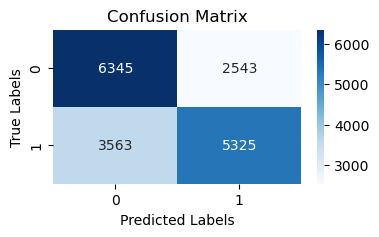

In [190]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np
from collections import Counter
from tqdm import tqdm
import time

# X = np.array(df_features)
# y =  np.array(labels_df['Arousal_Class'])

X = X_resampled
y = y_resampled
groups = groups_resampled

# Cross-validation setup
sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=206)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
gkf = GroupKFold(n_splits=5)

# Initialize variables 
fold_accuracies = []
fold_f1_scores = []
all_test = []
all_pred = []

# Splitting according to CV strategy
# for fold_idx, (train_idx, test_idx) in tqdm(enumerate(skf.split(X, y))):
for fold_idx, (train_idx, test_idx) in tqdm(enumerate(sgkf.split(X, y, groups))):
    print(f"\n=== Fold {fold_idx + 1} ===")
    
    start_time = time.time()

    # Split into train and test data 
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    # Define pipeline
    pipeline = Pipeline(steps=[
        # ('smote', SMOTE(random_state=4)),
        ('scaler', StandardScaler()),
        ('feature_selector', SelectFromModel(CatBoostClassifier(verbose=0, random_state = 26), threshold = "median")),
        ('classifier', SVC(random_state = 52))
    ])

    # Fit pipeline on training data
    pipeline.fit(X_train, y_train)

    end_time = time.time()
    print("Processing time:", end_time - start_time)

    # Access the feature selector step
    selector = pipeline.named_steps['feature_selector']
    
    # Get mask of selected features (boolean array)
    selected_feature_indices = selector.get_support(indices=True)
    print("Indices of selected features:", selected_feature_indices)
    
    # Predict on test set
    y_pred = pipeline.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')  # or 'macro' depending on your need

    print(f"Accuracy: {acc * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.4f}%")

    all_test.extend(y_test)
    all_pred.extend(y_pred)
    fold_accuracies.append(acc)
    fold_f1_scores.append(f1)

# Summary
print("\n=== Overall Results ===")
print("Mean Accuracy:", np.mean(fold_accuracies)*100)
print("Standard Deviation:", np.std(fold_accuracies))
print("Mean F1-score:", np.mean(fold_f1_scores)*100)
print("Report:","\n", classification_report(all_test, all_pred))

cm = confusion_matrix(all_test, all_pred)

# Visualize the confusion matrix (optional, but helpful)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") # Use heatmap for visualization
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Random Forest

0it [00:00, ?it/s]


=== Fold 1 ===


1it [00:33, 33.59s/it]

Processing time: 31.742801189422607
Indices of selected features: [  0   1   2   4   5   6   8   9  10  12  14  16  17  19  21  22  23  24
  25  28  31  32  33  34  36  37  38  39  40  42  43  44  45  48  49  51
  53  54  55  63  64  65  68  69  76  80  90  91  92  97  99 100 101 102
 106 108 109 110 111 112 114 116 118 120 124]
Accuracy: 76.12%
F1 Score: 75.7651%

=== Fold 2 ===


2it [01:04, 31.86s/it]

Processing time: 30.59764528274536
Indices of selected features: [  0   1   2   4   5   6   8   9  10  12  13  14  15  16  17  19  21  22
  23  24  25  27  28  29  33  34  35  36  37  38  39  40  42  43  44  45
  48  49  54  63  64  65  68  70  76  80  90  91  92  97  99 100 101 105
 106 108 109 110 111 112 114 116 118 120 124]
Accuracy: 76.34%
F1 Score: 76.1419%

=== Fold 3 ===


3it [01:34, 31.29s/it]

Processing time: 30.542895317077637
Indices of selected features: [  1   2   4   5   6   8   9  10  12  13  14  17  19  21  22  23  24  25
  27  28  29  30  31  32  33  34  35  36  38  39  40  41  43  45  46  48
  49  54  63  64  65  66  68  76  80  90  91  92  97  99 100 101 102 106
 107 108 109 110 111 112 114 116 118 120 124]
Accuracy: 72.74%
F1 Score: 72.2897%

=== Fold 4 ===


4it [02:05, 31.00s/it]

Processing time: 30.49359679222107
Indices of selected features: [  0   1   2   4   5   6   8   9  10  12  14  17  19  21  22  23  24  25
  27  28  31  32  33  34  35  36  37  38  39  40  41  42  44  45  46  48
  49  53  54  55  63  64  65  68  76  80  90  91  92  97  99 100 101 102
 105 108 109 110 112 114 116 118 120 122 124]
Accuracy: 75.05%
F1 Score: 74.9187%

=== Fold 5 ===


5it [02:36, 31.24s/it]

Processing time: 30.75614619255066
Indices of selected features: [  0   1   2   5   6   8   9  12  13  14  15  17  19  21  23  24  25  27
  28  30  31  33  34  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  54  63  64  65  66  68  69  76  80  90  91  92  97  99 100 101 102
 105 106 108 109 110 112 114 116 118 120 124]
Accuracy: 76.61%
F1 Score: 76.4617%

=== Overall Results ===
Mean Accuracy: 75.37378469528825
Standard Deviation: 0.014187317240132957
Mean F1-score: 75.11544521975885
Report: 
               precision    recall  f1-score   support

           0       0.71      0.85      0.78      8888
           1       0.82      0.65      0.73      8888

    accuracy                           0.75     17776
   macro avg       0.76      0.75      0.75     17776
weighted avg       0.76      0.75      0.75     17776



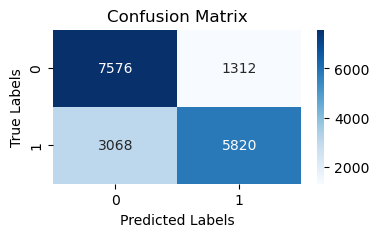

In [189]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import GroupKFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np
from collections import Counter
from tqdm import tqdm
import time

# X = np.array(df_features)
# y =  np.array(labels_df['Arousal_Class'])

X = X_resampled
y = y_resampled
groups = groups_resampled

# Cross-validation setup
sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=206)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
gkf = GroupKFold(n_splits=5)

# Initialize variables 
fold_accuracies = []
fold_f1_scores = []
all_test = []
all_pred = []

# Splitting according to CV strategy
# for fold_idx, (train_idx, test_idx) in tqdm(enumerate(skf.split(X, y))):
for fold_idx, (train_idx, test_idx) in tqdm(enumerate(sgkf.split(X, y, groups))):
    print(f"\n=== Fold {fold_idx + 1} ===")
    
    start_time = time.time()

    # Split into train and test data 
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    # Define pipeline
    pipeline = Pipeline(steps=[
        # ('smote', SMOTE(random_state=4)),
        ('scaler', StandardScaler()),
        ('feature_selector', SelectFromModel(CatBoostClassifier(verbose=0, random_state = 26), threshold = "median")),
        ('classifier', RandomForestClassifier(random_state = 52))
    ])

    # Fit pipeline on training data
    pipeline.fit(X_train, y_train)

    end_time = time.time()
    print("Processing time:", end_time - start_time)

    # Access the feature selector step
    selector = pipeline.named_steps['feature_selector']
    
    # Get mask of selected features (boolean array)
    selected_feature_indices = selector.get_support(indices=True)
    print("Indices of selected features:", selected_feature_indices)
    
    # Predict on test set
    y_pred = pipeline.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')  # or 'macro' depending on your need

    print(f"Accuracy: {acc * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.4f}%")

    all_test.extend(y_test)
    all_pred.extend(y_pred)
    fold_accuracies.append(acc)
    fold_f1_scores.append(f1)

# Summary
print("\n=== Overall Results ===")
print("Mean Accuracy:", np.mean(fold_accuracies)*100)
print("Standard Deviation:", np.std(fold_accuracies))
print("Mean F1-score:", np.mean(fold_f1_scores)*100)
print("Report:","\n", classification_report(all_test, all_pred))

cm = confusion_matrix(all_test, all_pred)

# Visualize the confusion matrix (optional, but helpful)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") # Use heatmap for visualization
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## XGBoost

0it [00:00, ?it/s]


=== Fold 1 ===


1it [00:20, 20.11s/it]

Processing time: 18.293421983718872
Indices of selected features: [  0   1   2   4   5   6   8   9  10  12  14  16  17  19  21  22  23  24
  25  28  31  32  33  34  36  37  38  39  40  42  43  44  45  48  49  51
  53  54  55  63  64  65  68  69  76  80  90  91  92  97  99 100 101 102
 106 108 109 110 111 112 114 116 118 120 124]
Accuracy: 70.89%
F1 Score: 70.6826%

=== Fold 2 ===


2it [00:37, 18.70s/it]

Processing time: 17.70425820350647
Indices of selected features: [  0   1   2   4   5   6   8   9  10  12  13  14  15  16  17  19  21  22
  23  24  25  27  28  29  33  34  35  36  37  38  39  40  42  43  44  45
  48  49  54  63  64  65  68  70  76  80  90  91  92  97  99 100 101 105
 106 108 109 110 111 112 114 116 118 120 124]
Accuracy: 72.95%
F1 Score: 72.9339%

=== Fold 3 ===


3it [00:55, 18.42s/it]

Processing time: 18.08158779144287
Indices of selected features: [  1   2   4   5   6   8   9  10  12  13  14  17  19  21  22  23  24  25
  27  28  29  30  31  32  33  34  35  36  38  39  40  41  43  45  46  48
  49  54  63  64  65  66  68  76  80  90  91  92  97  99 100 101 102 106
 107 108 109 110 111 112 114 116 118 120 124]
Accuracy: 71.21%
F1 Score: 70.9892%

=== Fold 4 ===


4it [01:14, 18.32s/it]

Processing time: 18.150502920150757
Indices of selected features: [  0   1   2   4   5   6   8   9  10  12  14  17  19  21  22  23  24  25
  27  28  31  32  33  34  35  36  37  38  39  40  41  42  44  45  46  48
  49  53  54  55  63  64  65  68  76  80  90  91  92  97  99 100 101 102
 105 108 109 110 112 114 116 118 120 122 124]
Accuracy: 72.41%
F1 Score: 72.3751%

=== Fold 5 ===


5it [01:32, 18.43s/it]

Processing time: 18.055988550186157
Indices of selected features: [  0   1   2   5   6   8   9  12  13  14  15  17  19  21  23  24  25  27
  28  30  31  33  34  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  54  63  64  65  66  68  69  76  80  90  91  92  97  99 100 101 102
 105 106 108 109 110 112 114 116 118 120 124]
Accuracy: 71.60%
F1 Score: 71.5256%

=== Overall Results ===
Mean Accuracy: 71.8116197881953
Standard Deviation: 0.007637393845974543
Mean F1-score: 71.70128393084593
Report: 
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      8888
           1       0.75      0.66      0.70      8888

    accuracy                           0.72     17776
   macro avg       0.72      0.72      0.72     17776
weighted avg       0.72      0.72      0.72     17776



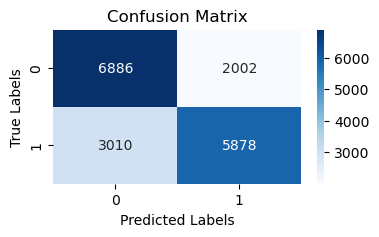

In [191]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np
from collections import Counter
from tqdm import tqdm
import time

# X = np.array(df_features)
# y =  np.array(labels_df['Arousal_Class'])

X = X_resampled
y = y_resampled
groups = groups_resampled

# Cross-validation setup
sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=206)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
gkf = GroupKFold(n_splits=5)

# Initialize variables 
fold_accuracies = []
fold_f1_scores = []
all_test = []
all_pred = []

# Splitting according to CV strategy
# for fold_idx, (train_idx, test_idx) in tqdm(enumerate(skf.split(X, y))):
for fold_idx, (train_idx, test_idx) in tqdm(enumerate(sgkf.split(X, y, groups))):
    print(f"\n=== Fold {fold_idx + 1} ===")
    
    start_time = time.time()

    # Split into train and test data 
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    # Define pipeline
    pipeline = Pipeline(steps=[
        # ('smote', SMOTE(random_state=4)),
        ('scaler', StandardScaler()),
        ('feature_selector', SelectFromModel(CatBoostClassifier(verbose=0, random_state = 26), threshold = "median")),
        ('classifier', XGBClassifier(random_state = 52))
    ])

    # Fit pipeline on training data
    pipeline.fit(X_train, y_train)

    end_time = time.time()
    print("Processing time:", end_time - start_time)

    # Access the feature selector step
    selector = pipeline.named_steps['feature_selector']
    
    # Get mask of selected features (boolean array)
    selected_feature_indices = selector.get_support(indices=True)
    print("Indices of selected features:", selected_feature_indices)
    
    # Predict on test set
    y_pred = pipeline.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')  # or 'macro' depending on your need

    print(f"Accuracy: {acc * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.4f}%")

    all_test.extend(y_test)
    all_pred.extend(y_pred)
    fold_accuracies.append(acc)
    fold_f1_scores.append(f1)

# Summary
print("\n=== Overall Results ===")
print("Mean Accuracy:", np.mean(fold_accuracies)*100)
print("Standard Deviation:", np.std(fold_accuracies))
print("Mean F1-score:", np.mean(fold_f1_scores)*100)
print("Report:","\n", classification_report(all_test, all_pred))

cm = confusion_matrix(all_test, all_pred)

# Visualize the confusion matrix (optional, but helpful)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") # Use heatmap for visualization
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()